# Which AFC North team has scored the most fantasy points over the last 10 years?
The reason that I wanted to do this analysis is because I was very curious about which team within the AFC north has scored the most fantasy points over the last few year. I thought it would be really cool to collect them all and see which has been the best, to then maybe ask the question of which team has produced the best fantasy players, and see if its a team based thing or completely random. My initial thoughts is that its just random, but I thought it would be cool to try to prove whether or not it is truly random. My original hypothesis is that the Steelers will lead at the end with the most fantasy points, as they have had one of the more consistent teams over the last 10 years. I then think the Ravens will be in second, as they have been pretty good over the last 10 years. In third I think it will be the Bengals, as they have found consistent success over the last few years. In last I think it will be the Browns, as they have had alot of poor performances over the last 10 seasons.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import time

### Cincinnati Bengals Data
This is the start of the data collection for the Cincinnati Bengals, I used the website https://www.pro-football-reference.com. All of these links link to different Cincinnati Bengals players. This code gathers data from the tables within Pro Football Reference and lets me put it into a list.

In [3]:
url_listBen = ['https://www.pro-football-reference.com/players/D/DaltAn00/fantasy/','https://www.pro-football-reference.com/players/B/BurrJo01/fantasy/',
            'https://www.pro-football-reference.com/players/G/GreeA.00/fantasy/','https://www.pro-football-reference.com/players/B/BoydTy00/fantasy/',
            'https://www.pro-football-reference.com/players/C/ChasJa00/fantasy/','https://www.pro-football-reference.com/players/B/BernGi00/fantasy/',
            'https://www.pro-football-reference.com/players/H/HillJe01/fantasy/','https://www.pro-football-reference.com/players/M/MixoJo00/fantasy/',
            'https://www.pro-football-reference.com/players/G/GresJe00/fantasy/','https://www.pro-football-reference.com/players/E/EifeTy00/fantasy/',
            'https://www.pro-football-reference.com/players/K/KrofTy00/fantasy/','https://www.pro-football-reference.com/players/U/UzomC.00/fantasy/',
            'https://www.pro-football-reference.com/players/S/SampDr00/fantasy/','https://www.pro-football-reference.com/players/H/HursHa00/fantasy/']

The code below is used to relabel the names that come in from Pro Football Reference. The original labels for the table were "tm, G, Unnamed: 0, and FantPt". I Changed these to "Team, Games Played, Year, and Fantasy Points"

In [4]:
def col_selection(df):
    df_new = df.rename(columns={'Tm': 'Team', 'G': 'Games Played', 'Unnamed: 0': 'Year', 'FantPt': 'Fantasy Points'})
    df_new = df_new[["Year", "Team", "Games Played", "Fantasy Points"]]
    df_new = df_new[df_new['Year'] > 2013]
    df_new = df_new.reset_index(drop = True)
    df_new['Year'] = df_new['Year'].astype(int)
    return df_new

This code below is used to tidy up the table that comes in from Pro Football Reference, as the table that comes in is very messy. I use the dfsBen to go back into the list of url to make the data frames for all of the Cincinnati Players

In [5]:
dfsBen = []

for i in url_listBen:
    response_df = pd.read_html(str(i), header = [1], skiprows = 1)[0]
    time.sleep(2)
    response_cleaned = col_selection(response_df)
    response_cleaned['Player'] = str(i)[49:-9]   
    dfsBen.append(response_cleaned)

#### Cincinnati Quarterbacks
The code below is used to narrow down the years that the players were the starter for the Cincinnati Bengals, in this case the Quarterbacks. Andy Dalton was the Quarterback for the Cincinnati Bengals from 2014 - 2019, and then Joe Burrow was the starter from 2020 - 2023

In [9]:
dalton = dfsBen[0].iloc[0:6]
burrow = dfsBen[1].iloc[0:4]

The code below combines the two tables into one, while also adding the player column so that way we can differentiate which player scored what points

In [10]:
bqb_df = pd.concat([dalton, burrow])
bqb_df['Player'] = ''
bqb_df = bqb_df.reset_index(drop = True)

The code below runs that tidy code that I talked about earlier to name the tables what I feel are very helpful to visualize the data, and the .loc code is used to separate the players between the years that they played

In [11]:
bqb_df = col_selection(bqb_df)
bqb_df.loc[:6, 'Player'] = 'Andy Dalton'
bqb_df.loc[6:, 'Player'] = 'Joe Burrow'
bqb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,16,224.62,Andy Dalton
1,2015,CIN,13,244.20,Andy Dalton
2,2016,CIN,16,260.64,Andy Dalton
3,2017,CIN,16,210.70,Andy Dalton
4,2018,CIN,11,174.54,Andy Dalton
5,2019,CIN,13,202.66,Andy Dalton
6,2020,CIN,10,173.72,Joe Burrow
7,2021,CIN,16,314.24,Joe Burrow
8,2022,CIN,16,350.70,Joe Burrow
9,2023,CIN,10,147.16,Joe Burrow


The code below is used to create a visual for the quarterbacks, so I decided to create a scatter plot that displays the dfference between the Quarterbacks by year.

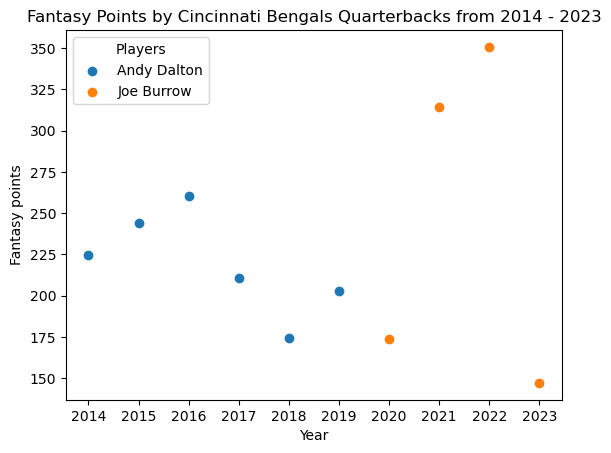

In [12]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in bqb_df['Player'].unique(): 
    player_data = bqb_df[bqb_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Quarterbacks from 2014 - 2023')

plt.show()

#### Cincinnati Wide Recievers
The code below all mirrors the same code that I used for the Quarterback data, and that stays consistent throughout the rest of code. Since it all stays the same, I am just going to go through and label the team and the position group so its easy to see what code associates with what

In [13]:
green = dfsBen[2].iloc[0:4]
boyd = dfsBen[3].iloc[2:5]
chase = dfsBen[4].iloc[0:3]

In [14]:
bwr_df = pd.concat([green, boyd, chase])
bwr_df['Player'] = ''
bwr_df = bwr_df.reset_index(drop = True)

In [15]:
bwr_df = col_selection(bwr_df)
bwr_df.loc[:4, 'Player'] = 'AJ Green'
bwr_df.loc[4:5, 'Player'] = 'Tyler Boyd'
bwr_df.loc[6:, 'Player'] = 'Jamarr Chase'
bwr_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,13,136.30,AJ Green
1,2015,CIN,16,187.70,AJ Green
2,2016,CIN,10,120.40,AJ Green
3,2017,CIN,16,151.80,AJ Green
4,2018,CIN,14,145.10,Tyler Boyd
5,2019,CIN,16,132.90,Tyler Boyd
6,2020,CIN,15,113.64,Jamarr Chase
7,2021,CIN,17,223.60,Jamarr Chase
8,2022,CIN,12,155.40,Jamarr Chase
9,2023,CIN,16,162.72,Jamarr Chase


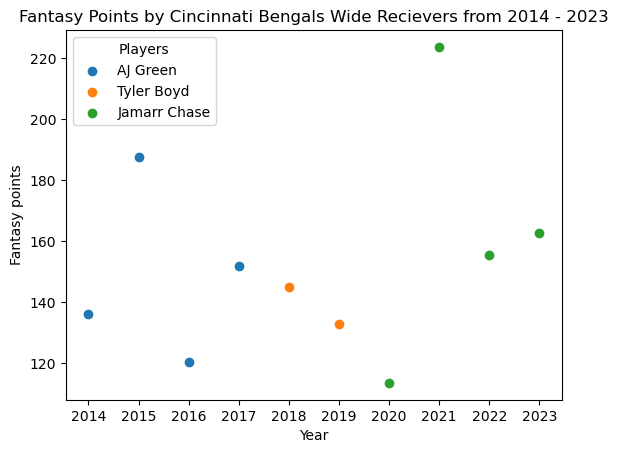

In [16]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in bwr_df['Player'].unique(): 
    player_data = bwr_df[bwr_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Wide Recievers from 2014 - 2023')

plt.show()

#### Cincinnati Running Backs

In [17]:
bernard = dfsBen[5].iloc[0:1]
hill = dfsBen[6].iloc[1:3]
mixon = dfsBen[7].iloc[0:7]

In [18]:
brb_df = pd.concat([bernard, hill, mixon])
brb_df['Player'] = ''
brb_df = brb_df.reset_index(drop = True)

In [19]:
brb_df = col_selection(brb_df)
brb_df.loc[:0, 'Player'] = 'Giovani Bernard'
brb_df.loc[1:2, 'Player'] = 'Jeremy Hill'
brb_df.loc[3:, 'Player'] = 'Joe Mixon'
brb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,13,144.9,Giovani Bernard
1,2015,CIN,16,155.3,Jeremy Hill
2,2016,CIN,15,155.3,Jeremy Hill
3,2017,CIN,14,111.3,Joe Mixon
4,2018,CIN,14,200.4,Joe Mixon
5,2019,CIN,16,190.4,Joe Mixon
6,2020,CIN,6,78.6,Joe Mixon
7,2021,CIN,16,245.9,Joe Mixon
8,2022,CIN,14,179.5,Joe Mixon
9,2023,CIN,17,215.0,Joe Mixon


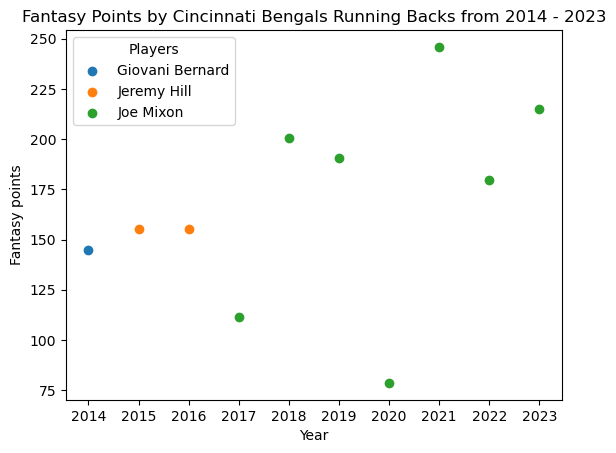

In [20]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in brb_df['Player'].unique(): 
    player_data = brb_df[brb_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Bengals Running Backs from 2014 - 2023')

plt.show()

#### Cincinnati Tight Ends

This code is a little different than the rest, as I had to try to split up the years that Drew Sample was the starter with Hayden Hurst. For this, I used ChatGPT to help me figure out the code, as we had not gone over anything like that in class. While I used AI to help, the way that this code works make sense, as it assigns hurst to a specific year, while also using code to drop the 2022 year for Drew Sample.

In [21]:
gresham = dfsBen[8].iloc[0:1]
eifert = dfsBen[9].iloc[1:2]
kroft = dfsBen[10].iloc[1:3]
uzomah = dfsBen[11].iloc[3:5]
sample = dfsBen[12].iloc[1:5]
hurst = dfsBen[13].iloc[4:5]
hurst = hurst[hurst['Year'] == 2022]

In [22]:
bte_df = pd.concat([gresham, eifert, kroft, uzomah, sample, hurst])
bte_df['Player'] = ''
bte_df = bte_df.reset_index(drop = True)

In [23]:
hurst['Player'] = 'Hayden Hurst'

bte_df = col_selection(bte_df)
bte_df = pd.concat([bte_df, hurst], ignore_index=True)

bte_df.loc[0, 'Player'] = 'Jermaine Gresham'
bte_df.loc[1, 'Player'] = 'Tyler Eifert'
bte_df.loc[2:3, 'Player'] = 'Tyler Kroft'
bte_df.loc[4:5, 'Player'] = 'CJ Uzomah'
bte_df.loc[(bte_df['Year'] == 2020) | (bte_df['Year'] == 2021), 'Player'] = 'Drew Sample'
bte_df.loc[(bte_df['Year'] == 2023), 'Player'] = 'Drew Sample'
bte_df = bte_df[~((bte_df['Player'] == 'Drew Sample') & (bte_df['Year'] == 2022))]
bte_df = bte_df.dropna(subset=['Year', 'Player'])
bte_df = bte_df.sort_values(by='Year').reset_index(drop=True)

bte_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CIN,15,76.0,Jermaine Gresham
1,2015,CIN,13,139.5,Tyler Eifert
2,2016,CIN,14,9.2,Tyler Kroft
3,2017,CIN,16,82.4,Tyler Kroft
4,2018,CIN,16,61.9,CJ Uzomah
5,2019,CIN,16,36.2,CJ Uzomah
6,2020,CIN,16,38.9,Drew Sample
7,2021,CIN,17,8.1,Drew Sample
8,2022,CIN,13,53.4,Hayden Hurst
9,2023,CIN,17,28.4,Drew Sample


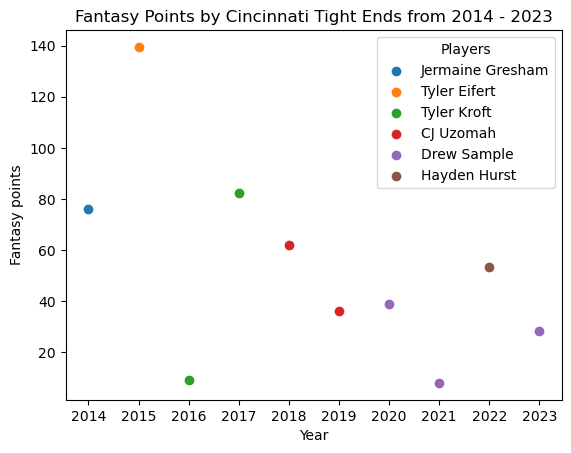

In [24]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots()

for player in bte_df['Player'].unique(): 
    player_data = bte_df[bte_df['Player'] == player] 
    ax1.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fantasy points')
ax1.set_title('Fantasy Points by Cincinnati Tight Ends from 2014 - 2023')

plt.show()

#### Total Cincinnati Postion Group Graph

This code below is where I combined the graphs that I made for all of the position groups. I was able to set specific titles and labels for each graph to help differentiate them, while creating an overall title for the whole graph.

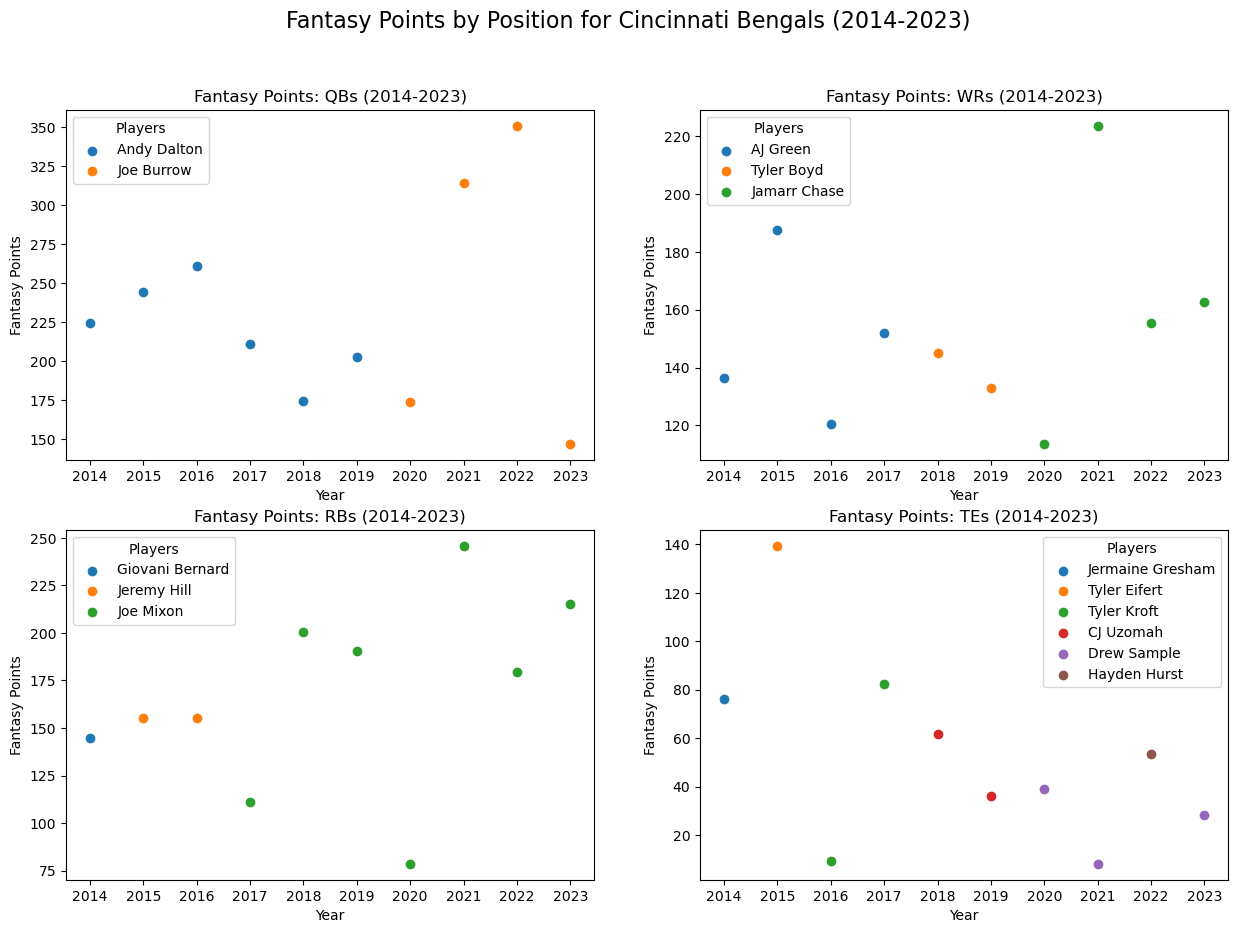

In [25]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig1, ax1 = plt.subplots(2, 2, figsize=(15, 10))

for player in bqb_df['Player'].unique(): 
    player_data = bqb_df[bqb_df['Player'] == player] 
    ax1[0,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[0,0].set_xlabel('Year')
ax1[0,0].set_ylabel('Fantasy Points')
ax1[0,0].set_title('Fantasy Points: QBs (2014-2023)')
ax1[0,0].set_xticks(years) 
ax1[0,0].legend(title='Players')

for player in bwr_df['Player'].unique(): 
    player_data = bwr_df[bwr_df['Player'] == player] 
    ax1[0,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[0,1].set_xlabel('Year')
ax1[0,1].set_ylabel('Fantasy Points')
ax1[0,1].set_title('Fantasy Points: WRs (2014-2023)')
ax1[0,1].set_xticks(years)
ax1[0,1].legend(title='Players')

for player in brb_df['Player'].unique(): 
    player_data = brb_df[brb_df['Player'] == player] 
    ax1[1,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[1,0].set_xlabel('Year')
ax1[1,0].set_ylabel('Fantasy Points')
ax1[1,0].set_title('Fantasy Points: RBs (2014-2023)')
ax1[1,0].set_xticks(years)
ax1[1,0].legend(title='Players')

for player in bte_df['Player'].unique(): 
    player_data = bte_df[bte_df['Player'] == player] 
    ax1[1,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax1[1,1].set_xlabel('Year')
ax1[1,1].set_ylabel('Fantasy Points')
ax1[1,1].set_title('Fantasy Points: TEs (2014-2023)')
ax1[1,1].set_xticks(years)
ax1[1,1].legend(title='Players')

fig1.suptitle('Fantasy Points by Position for Cincinnati Bengals (2014-2023)', fontsize=16)
plt.show()

#### Cincinnati Total Fantasy Points

The code below is to calculate the total fantasy points that were scored by the bengals over the last 10 years. I assigned this code to a variable that I am going to use at the end to make a complete bar graph of all the teams to compare which one had the most fantasy points

In [26]:
bqb_fantasy_points = bqb_df['Fantasy Points'].sum()
bwr_fantasy_points = bwr_df['Fantasy Points'].sum()
bte_fantasy_points = bte_df['Fantasy Points'].sum()
brb_fantasy_points = brb_df['Fantasy Points'].sum()

ben_tot_fantasy_points = bqb_fantasy_points + bwr_fantasy_points + bte_fantasy_points + brb_fantasy_points

In [27]:
ben_tot_fantasy_points

6043.34

### Baltimore Ravens Data

In [28]:
url_listRav = ['https://www.pro-football-reference.com/players/F/FlacJo00/fantasy/','https://www.pro-football-reference.com/players/J/JackLa00/fantasy/',
              'https://www.pro-football-reference.com/players/S/SmitSt01/fantasy/','https://www.pro-football-reference.com/players/A/AikeKa00/fantasy/',
              'https://www.pro-football-reference.com/players/W/WallMi00/fantasy/','https://www.pro-football-reference.com/players/B/BrowJo02/fantasy/',
              'https://www.pro-football-reference.com/players/B/BrowMa04/fantasy/','https://www.pro-football-reference.com/players/D/DuveDe00/fantasy/',
              'https://www.pro-football-reference.com/players/F/FlowZa00/fantasy/','https://www.pro-football-reference.com/players/F/ForsJu00/fantasy/',
              'https://www.pro-football-reference.com/players/J/JuszKy00/fantasy/','https://www.pro-football-reference.com/players/C/CollAl00/fantasy/',
              'https://www.pro-football-reference.com/players/I/IngrMa01/fantasy/','https://www.pro-football-reference.com/players/F/FreeDe00/fantasy/',
              'https://www.pro-football-reference.com/players/D/DobbJK00/fantasy/','https://www.pro-football-reference.com/players/E/EdwaGu00/fantasy/',
              'https://www.pro-football-reference.com/players/D/DaniOw00/fantasy/','https://www.pro-football-reference.com/players/G/GillCr00/fantasy/',
              'https://www.pro-football-reference.com/players/P/PittDe00/fantasy/','https://www.pro-football-reference.com/players/B/BoylNi00/fantasy/',
              'https://www.pro-football-reference.com/players/A/AndrMa00/fantasy/']

In [29]:
dfsRav = []

for i in url_listRav:
    response_df = pd.read_html(str(i), header = [1], skiprows = 1)[0]
    time.sleep(2)
    response_cleaned = col_selection(response_df)
    response_cleaned['Player'] = [str(i)[49:-9]]*len(response_cleaned.index)
    dfsRav.append(response_cleaned)

#### Baltimore Quarterbacks

In [30]:
flacco = dfsRav[0].iloc[0:4]
jackson = dfsRav[1].iloc[0:6]

In [31]:
rqb_df = pd.concat([flacco, jackson])
rqb_df['Player'] = ''
rqb_df = rqb_df.reset_index(drop = True)
rqb_df = col_selection(rqb_df)
rqb_df.loc[:4, 'Player'] = 'Joe Flacco'
rqb_df.loc[4:, 'Player'] = 'Lamar Jackson'
rqb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,BAL,16,262.44,Joe Flacco
1,2015,BAL,10,161.94,Joe Flacco
2,2016,BAL,16,242.48,Joe Flacco
3,2017,BAL,16,185.04,Joe Flacco
4,2018,BAL,16,157.54,Lamar Jackson
5,2019,BAL,15,415.68,Lamar Jackson
6,2020,BAL,15,332.78,Lamar Jackson
7,2021,BAL,12,239.98,Lamar Jackson
8,2022,BAL,12,236.08,Lamar Jackson
9,2023,BAL,16,331.22,Lamar Jackson


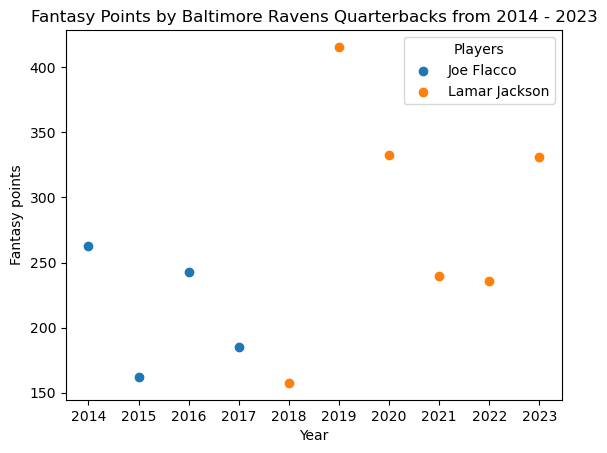

In [32]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig2, ax2 = plt.subplots()

for player in rqb_df['Player'].unique(): 
    player_data = rqb_df[rqb_df['Player'] == player] 
    ax2.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fantasy points')
ax2.set_title('Fantasy Points by Baltimore Ravens Quarterbacks from 2014 - 2023')

plt.show()

#### Baltimore Wide Recievers

In [33]:
smith = dfsRav[2].iloc[0:1]
aiken = dfsRav[3].iloc[1:2]
wallace = dfsRav[4].iloc[2:4]
jbrown = dfsRav[5].iloc[4:5]
mbrown = dfsRav[6].iloc[0:3]
duvernay = dfsRav[7].iloc[2:3]
flowers = dfsRav[8].iloc[0:1]

In [34]:
rwr_df = pd.concat([smith, aiken, wallace, jbrown, mbrown, duvernay, flowers])
rwr_df['Player'] = ''
rwr_df = rwr_df.reset_index(drop = True)
rwr_df = col_selection(rwr_df)
rwr_df.loc[0, 'Player'] = 'Steve Smith Sr.'
rwr_df.loc[1, 'Player'] = 'Kamar Aiken'
rwr_df.loc[2:3, 'Player'] = 'Mike Wallace'
rwr_df.loc[4, 'Player'] = 'John Brown'
rwr_df.loc[5:7, 'Player'] = 'Marquise Brown'
rwr_df.loc[8, 'Player'] = 'Devin Duvernay'
rwr_df.loc[9, 'Player'] = 'Zay Flowers'
rwr_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,BAL,16,140.5,Steve Smith Sr.
1,2015,BAL,16,122.5,Kamar Aiken
2,2016,BAL,16,130.8,Mike Wallace
3,2017,BAL,15,99.2,Mike Wallace
4,2018,BAL,16,101.9,John Brown
5,2019,BAL,14,100.6,Marquise Brown
6,2020,BAL,16,125.0,Marquise Brown
7,2021,BAL,16,135.3,Marquise Brown
8,2022,BAL,14,79.1,Devin Duvernay
9,2023,BAL,16,129.4,Zay Flowers


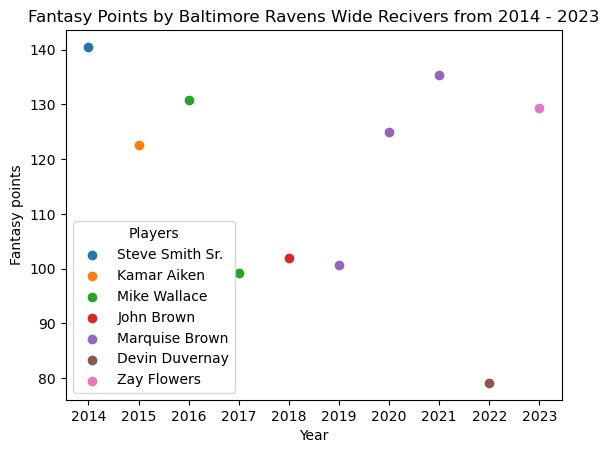

In [35]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig2, ax2 = plt.subplots()

for player in rwr_df['Player'].unique(): 
    player_data = rwr_df[rwr_df['Player'] == player] 
    ax2.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fantasy points')
ax2.set_title('Fantasy Points by Baltimore Ravens Wide Recivers from 2014 - 2023')

plt.show()

#### Baltimore Running Backs

In [37]:
forsett = dfsRav[9].iloc[0:2]
juszczyk = dfsRav[10].iloc[2:3]
collins = dfsRav[11].iloc[1:3]
ingram = dfsRav[12].iloc[5:7]
freeman = dfsRav[13].iloc[7:8]
dobbins = dfsRav[14].iloc[1:2]
edwards = dfsRav[15].iloc[4:5]

In [38]:
rrb_df = pd.concat([forsett, juszczyk, collins, ingram, freeman, dobbins, edwards])
rrb_df['Player'] = ''
rrb_df = rrb_df.reset_index(drop = True)
rrb_df = col_selection(rrb_df)
rrb_df.loc[0:1, 'Player'] = 'Justin Forsett'
rrb_df.loc[2, 'Player'] = 'Kyle Juszczyk'
rrb_df.loc[3:4, 'Player'] = 'Alex Collins'
rrb_df.loc[5:6, 'Player'] = 'Mark Ingram'
rrb_df.loc[7, 'Player'] = 'Devonta Freeman'
rrb_df.loc[8, 'Player'] = 'J.K. Dobbins'
rrb_df.loc[9, 'Player'] = 'Gus Edwards'
rrb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,BAL,16,202.9,Justin Forsett
1,2015,BAL,10,91.4,Justin Forsett
2,2016,BAL,16,36.8,Kyle Juszczyk
3,2017,BAL,15,148.0,Alex Collins
4,2018,BAL,10,93.6,Alex Collins
5,2019,BAL,15,216.5,Mark Ingram
6,2020,BAL,11,46.9,Mark Ingram
7,2021,BAL,16,112.6,Devonta Freeman
8,2022,BAL,8,74.2,J.K. Dobbins
9,2023,BAL,17,175.0,Gus Edwards


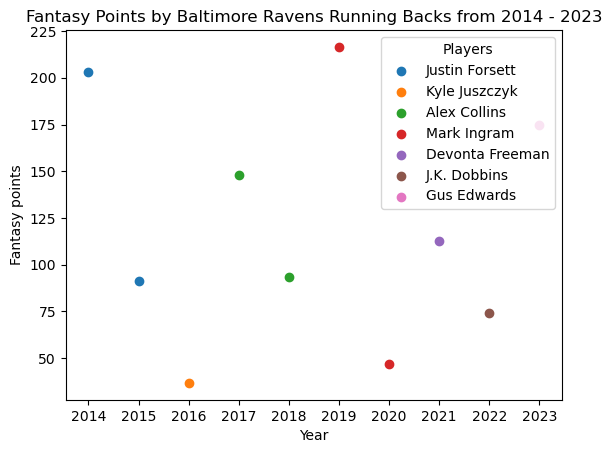

In [39]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig2, ax2 = plt.subplots()

for player in rrb_df['Player'].unique(): 
    player_data = rrb_df[rrb_df['Player'] == player] 
    ax2.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fantasy points')
ax2.set_title('Fantasy Points by Baltimore Ravens Running Backs from 2014 - 2023')

plt.show()

#### Baltimore Tight Ends

In [40]:
daniels = dfsRav[16].iloc[0:1]
gillmore = dfsRav[17].iloc[1:2]
pitta = dfsRav[18].iloc[1:2]
boyle = dfsRav[19].iloc[2:4]
andrews = dfsRav[20].iloc[1:6]

In [41]:
rte_df = pd.concat([daniels, gillmore, pitta, boyle, andrews])
rte_df['Player'] = ''
rte_df = rte_df.reset_index(drop = True)
rte_df = col_selection(rte_df)
rte_df.loc[0, 'Player'] = 'Owen Daniels'
rte_df.loc[1, 'Player'] = 'Crockett Gillmore'
rte_df.loc[2, 'Player'] = 'Dennis Pitta'
rte_df.loc[3:4, 'Player'] = 'Nick Boyle'
rte_df.loc[5:, 'Player'] = 'Mark Andrews'
rte_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,BAL,15,76.7,Owen Daniels
1,2015,BAL,10,65.2,Crockett Gillmore
2,2016,BAL,16,82.9,Dennis Pitta
3,2017,BAL,15,22.3,Nick Boyle
4,2018,BAL,16,21.3,Nick Boyle
5,2019,BAL,15,143.2,Mark Andrews
6,2020,BAL,14,112.1,Mark Andrews
7,2021,BAL,17,194.1,Mark Andrews
8,2022,BAL,15,117.5,Mark Andrews
9,2023,BAL,10,90.4,Mark Andrews


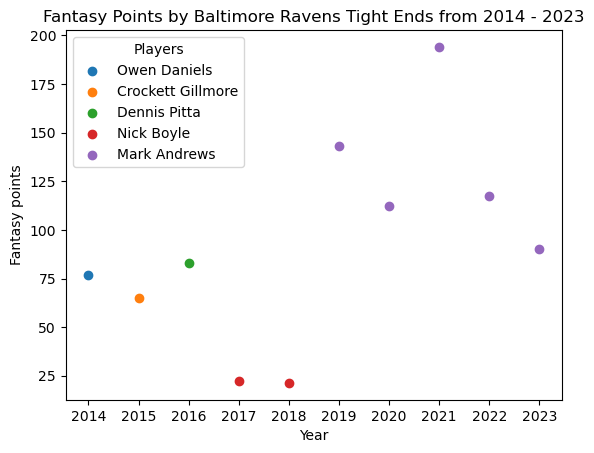

In [42]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig2, ax2 = plt.subplots()

for player in rte_df['Player'].unique(): 
    player_data = rte_df[rte_df['Player'] == player] 
    ax2.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax2.set_xlabel('Year')
ax2.set_ylabel('Fantasy points')
ax2.set_title('Fantasy Points by Baltimore Ravens Tight Ends from 2014 - 2023')

plt.show()

#### Total Baltimore Position Group Graph

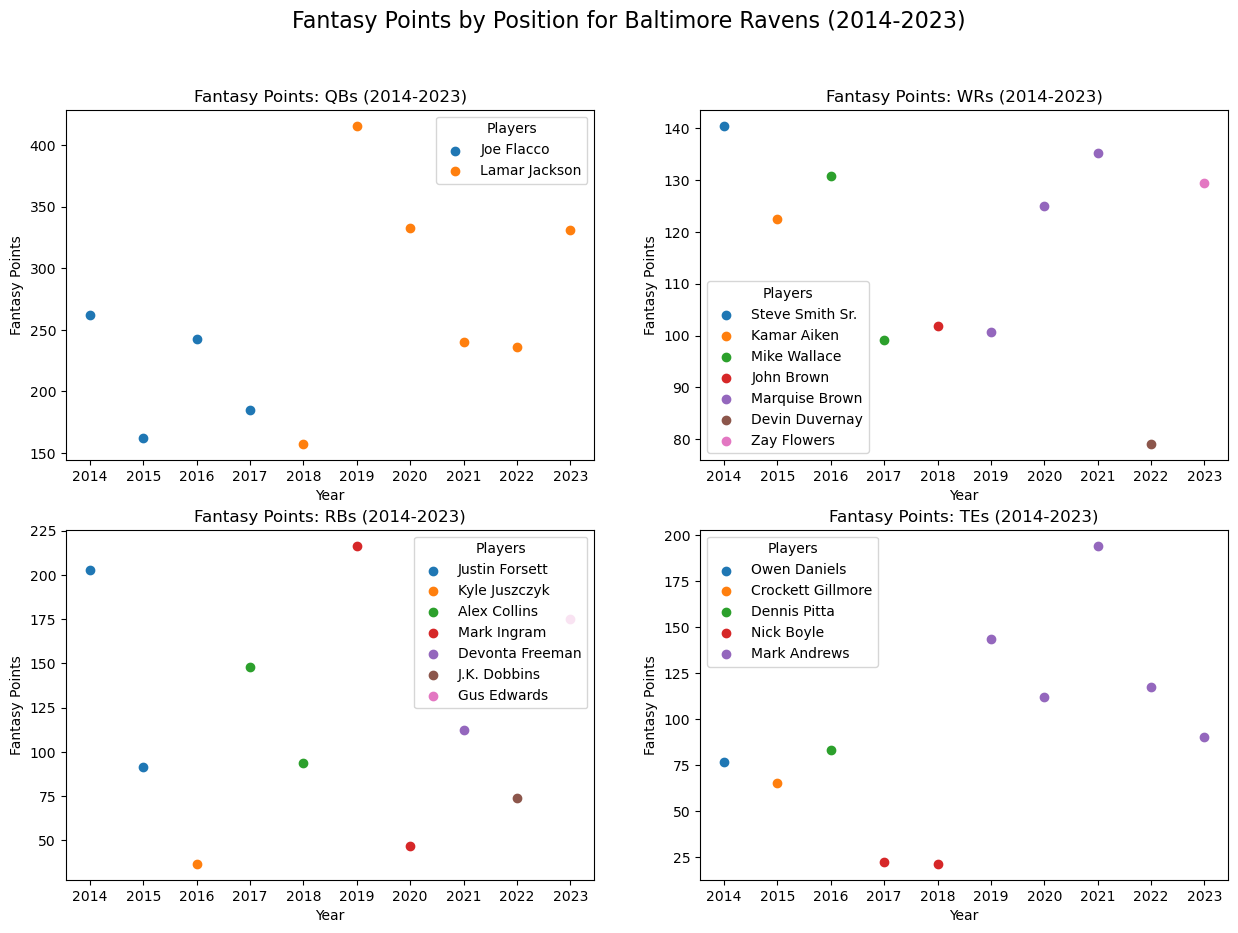

In [45]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig2, ax2 = plt.subplots(2, 2, figsize=(15, 10))

for player in rqb_df['Player'].unique(): 
    player_data = rqb_df[rqb_df['Player'] == player] 
    ax2[0,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax2[0,0].set_xlabel('Year')
ax2[0,0].set_ylabel('Fantasy Points')
ax2[0,0].set_title('Fantasy Points: QBs (2014-2023)')
ax2[0,0].set_xticks(years) 
ax2[0,0].legend(title='Players')

for player in rwr_df['Player'].unique(): 
    player_data = rwr_df[rwr_df['Player'] == player] 
    ax2[0,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax2[0,1].set_xlabel('Year')
ax2[0,1].set_ylabel('Fantasy Points')
ax2[0,1].set_title('Fantasy Points: WRs (2014-2023)')
ax2[0,1].set_xticks(years)
ax2[0,1].legend(title='Players')

for player in rrb_df['Player'].unique(): 
    player_data = rrb_df[rrb_df['Player'] == player] 
    ax2[1,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax2[1,0].set_xlabel('Year')
ax2[1,0].set_ylabel('Fantasy Points')
ax2[1,0].set_title('Fantasy Points: RBs (2014-2023)')
ax2[1,0].set_xticks(years)
ax2[1,0].legend(title='Players')

for player in rte_df['Player'].unique(): 
    player_data = rte_df[rte_df['Player'] == player] 
    ax2[1,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax2[1,1].set_xlabel('Year')
ax2[1,1].set_ylabel('Fantasy Points')
ax2[1,1].set_title('Fantasy Points: TEs (2014-2023)')
ax2[1,1].set_xticks(years)
ax2[1,1].legend(title='Players')

fig2.suptitle('Fantasy Points by Position for Baltimore Ravens (2014-2023)', fontsize=16)
plt.show()

#### Baltimore Total Fantasy Points

In [46]:
rqb_fantasy_points = rqb_df['Fantasy Points'].sum()
rwr_fantasy_points = rwr_df['Fantasy Points'].sum()
rte_fantasy_points = rte_df['Fantasy Points'].sum()
rrb_fantasy_points = rrb_df['Fantasy Points'].sum()

rav_tot_fantasy_points = rqb_fantasy_points + rwr_fantasy_points + rte_fantasy_points + rrb_fantasy_points
rav_tot_fantasy_points

5853.08

### Pittsburgh Steelers Data

In [47]:
url_listSte = ['https://www.pro-football-reference.com/players/R/RoetBe00/fantasy/','https://www.pro-football-reference.com/players/P/PickKe00/fantasy/',
              'https://www.pro-football-reference.com/players/B/BrowAn04/fantasy/','https://www.pro-football-reference.com/players/J/JohnDi01/fantasy/',
              'https://www.pro-football-reference.com/players/P/PickGe00/fantasy/','https://www.pro-football-reference.com/players/B/BellLe00/fantasy/',
              'https://www.pro-football-reference.com/players/C/ConnJa00/fantasy/','https://www.pro-football-reference.com/players/H/HarrNa00/fantasy/',
              'https://www.pro-football-reference.com/players/M/MillHe00/fantasy/','https://www.pro-football-reference.com/players/J/JameJe00/fantasy/',
              'https://www.pro-football-reference.com/players/M/McDoVa00/fantasy/','https://www.pro-football-reference.com/players/F/FreiPa00/fantasy/']

In [48]:
dfsSte = []

for i in url_listSte:
    response_df = pd.read_html(str(i), header = [1], skiprows = 1)[0]
    time.sleep(2)
    response_cleaned = col_selection(response_df)
    response_cleaned['Player'] = [str(i)[49:-9]]*len(response_cleaned.index)
    dfsSte.append(response_cleaned)

#### Pittsburgh Quarterbacks

In [49]:
roethlisberger = dfsSte[0].iloc[0:8]
pickett = dfsSte[1].iloc[0:2]

In [50]:
sqb_df = pd.concat([roethlisberger, pickett])
sqb_df['Player'] = ''
sqb_df = sqb_df.reset_index(drop = True)
sqb_df = col_selection(sqb_df)
sqb_df.loc[0:7, 'Player'] = 'Ben Roethlisberger'
sqb_df.loc[8:9, 'Player'] = 'Kenny Pickett'
sqb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,PIT,16,306.18,Ben Roethlisberger
1,2015,PIT,12,228.12,Ben Roethlisberger
2,2016,PIT,14,252.16,Ben Roethlisberger
3,2017,PIT,15,260.74,Ben Roethlisberger
4,2018,PIT,16,340.86,Ben Roethlisberger
5,2019,PIT,2,12.74,Ben Roethlisberger
6,2020,PIT,15,267.22,Ben Roethlisberger
7,2021,PIT,16,218.10,Ben Roethlisberger
8,2022,PIT,13,149.86,Kenny Pickett
9,2023,PIT,12,110.20,Kenny Pickett


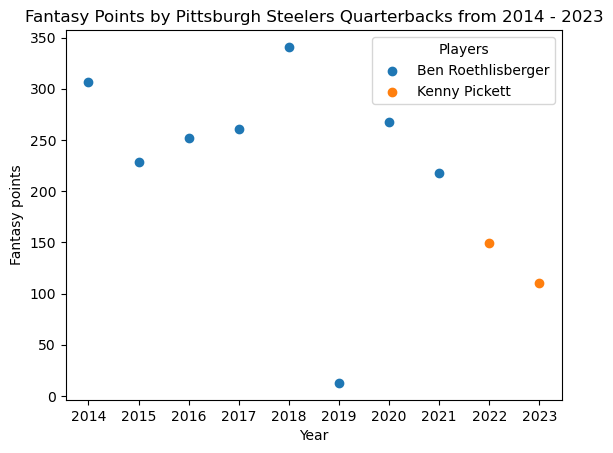

In [51]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig3, ax3 = plt.subplots()

for player in sqb_df['Player'].unique(): 
    player_data = sqb_df[sqb_df['Player'] == player] 
    ax3.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax3.set_xlabel('Year')
ax3.set_ylabel('Fantasy points')
ax3.set_title('Fantasy Points by Pittsburgh Steelers Quarterbacks from 2014 - 2023')

plt.show()

#### Pittsburgh Wide Recievers

In [52]:
abrown = dfsSte[2].iloc[0:5]
johnson = dfsSte[3].iloc[0:3]
pickens = dfsSte[4].iloc[0:2]

In [53]:
swr_df = pd.concat([abrown, johnson, pickens])
swr_df['Player'] = ''
swr_df = swr_df.reset_index(drop = True)
swr_df = col_selection(swr_df)
swr_df.loc[0:4, 'Player'] = 'Antonio Brown'
swr_df.loc[5:7, 'Player'] = 'Dionte Johnson'
swr_df.loc[8:9, 'Player'] = 'George Pickens'
swr_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,PIT,16,257.9,Antonio Brown
1,2015,PIT,16,252.2,Antonio Brown
2,2016,PIT,15,201.3,Antonio Brown
3,2017,PIT,14,209.3,Antonio Brown
4,2018,PIT,15,219.7,Antonio Brown
5,2019,PIT,16,104.1,Dionte Johnson
6,2020,PIT,15,134.0,Dionte Johnson
7,2021,PIT,16,167.4,Dionte Johnson
8,2022,PIT,17,114.5,George Pickens
9,2023,PIT,17,145.9,George Pickens


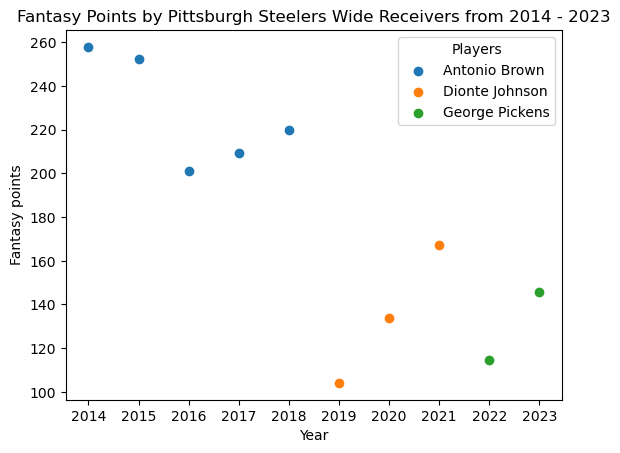

In [54]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig3, ax3 = plt.subplots()

for player in swr_df['Player'].unique(): 
    player_data = swr_df[swr_df['Player'] == player] 
    ax3.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax3.set_xlabel('Year')
ax3.set_ylabel('Fantasy points')
ax3.set_title('Fantasy Points by Pittsburgh Steelers Wide Receivers from 2014 - 2023')

plt.show()

#### Pittsburgh Running Backs

In [55]:
bell = dfsSte[5].iloc[0:4]
connor = dfsSte[6].iloc[1:4]
harris = dfsSte[7].iloc[0:3]

In [56]:
srb_df = pd.concat([bell, connor, harris])
srb_df['Player'] = ''
srb_df = srb_df.reset_index(drop = True)
srb_df = col_selection(srb_df)
srb_df.loc[0:3, 'Player'] = 'LeVeon Bell'
srb_df.loc[4:6, 'Player'] = 'James Connor'
srb_df.loc[7:9, 'Player'] = 'Najee Harris'
srb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,PIT,16,287.50,LeVeon Bell
1,2015,PIT,6,87.20,LeVeon Bell
2,2016,PIT,12,242.40,LeVeon Bell
3,2017,PIT,15,256.60,LeVeon Bell
4,2018,PIT,13,225.00,James Connor
5,2019,PIT,10,111.50,James Connor
6,2020,PIT,13,129.60,James Connor
7,2021,PIT,17,226.70,Najee Harris
8,2022,PIT,17,182.46,Najee Harris
9,2023,PIT,17,166.50,Najee Harris


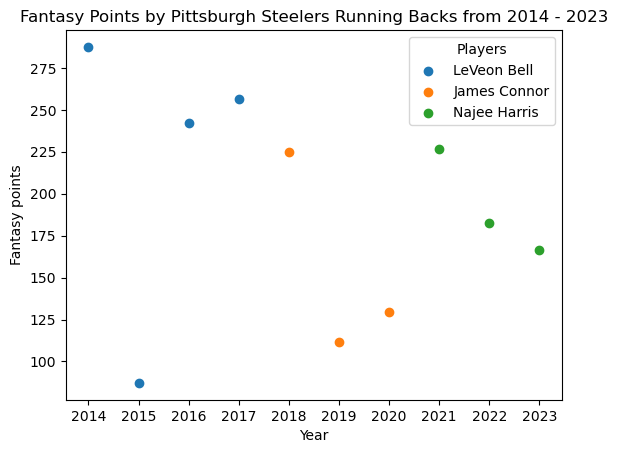

In [57]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig3, ax3 = plt.subplots()

for player in srb_df['Player'].unique(): 
    player_data = srb_df[srb_df['Player'] == player] 
    ax3.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax3.set_xlabel('Year')
ax3.set_ylabel('Fantasy points')
ax3.set_title('Fantasy Points by Pittsburgh Steelers Running Backs from 2014 - 2023')

plt.show()

#### Pittsburgh Tight Ends

In [58]:
miller = dfsSte[8].iloc[0:2]
james = dfsSte[9].iloc[1:4]
mcdonald = dfsSte[10].iloc[5:7]
freiermuth = dfsSte[11].iloc[0:3]

In [59]:
ste_df = pd.concat([miller, james, mcdonald, freiermuth])
ste_df['Player'] = ''
ste_df = ste_df.reset_index(drop = True)
ste_df = col_selection(ste_df)
ste_df.loc[0:1, 'Player'] = 'Heath Miller'
ste_df.loc[2:4, 'Player'] = 'Jesse James'
ste_df.loc[5:6, 'Player'] = 'Vance McDonald'
ste_df.loc[7:9, 'Player'] = 'Pat Freiermuth'
ste_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,PIT,16,94.1,Heath Miller
1,2015,PIT,15,67.7,Heath Miller
2,2016,PIT,16,51.8,Jesse James
3,2017,PIT,16,55.2,Jesse James
4,2018,PIT,16,54.3,Jesse James
5,2019,PIT,14,45.5,Vance McDonald
6,2020,PIT,14,9.9,Vance McDonald
7,2021,PIT,16,91.7,Pat Freiermuth
8,2022,PIT,16,85.2,Pat Freiermuth
9,2023,PIT,12,44.8,Pat Freiermuth


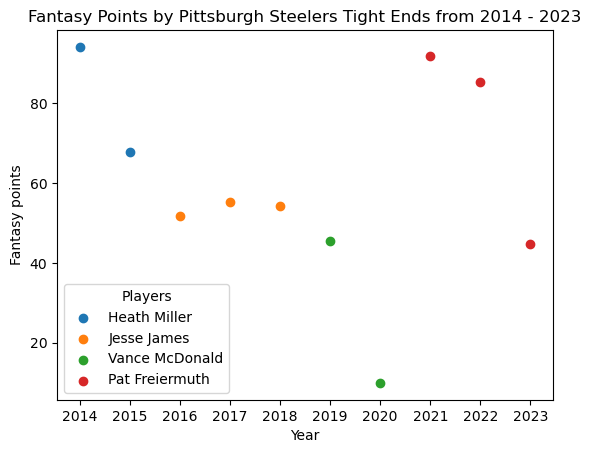

In [60]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig3, ax3 = plt.subplots()

for player in ste_df['Player'].unique(): 
    player_data = ste_df[ste_df['Player'] == player] 
    ax3.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax3.set_xlabel('Year')
ax3.set_ylabel('Fantasy points')
ax3.set_title('Fantasy Points by Pittsburgh Steelers Tight Ends from 2014 - 2023')

plt.show()

#### Total Pittsburgh Postition Group Graph

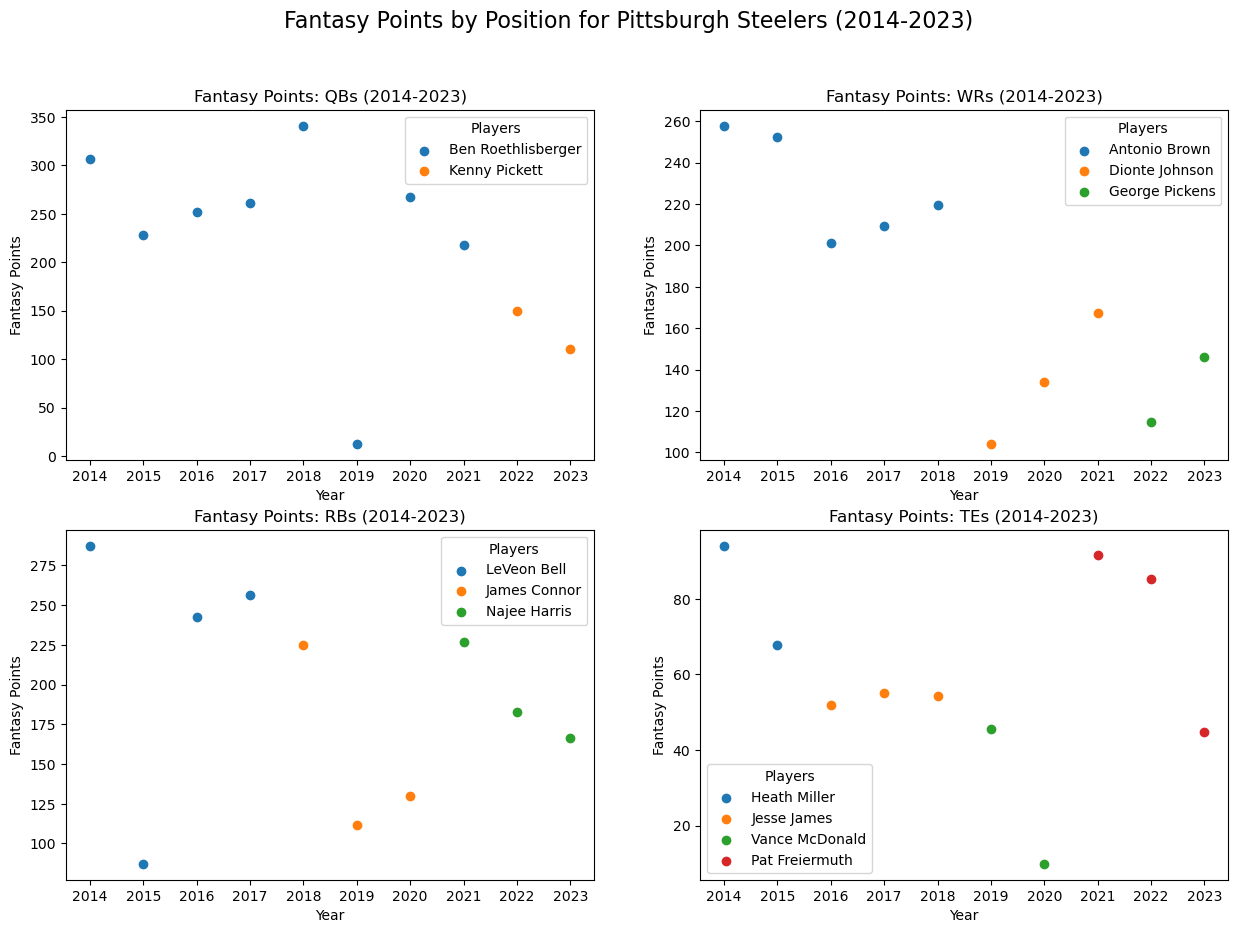

In [61]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig3, ax3 = plt.subplots(2, 2, figsize=(15, 10))

for player in sqb_df['Player'].unique(): 
    player_data = sqb_df[sqb_df['Player'] == player] 
    ax3[0,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax3[0,0].set_xlabel('Year')
ax3[0,0].set_ylabel('Fantasy Points')
ax3[0,0].set_title('Fantasy Points: QBs (2014-2023)')
ax3[0,0].set_xticks(years) 
ax3[0,0].legend(title='Players')

for player in swr_df['Player'].unique(): 
    player_data = swr_df[swr_df['Player'] == player] 
    ax3[0,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax3[0,1].set_xlabel('Year')
ax3[0,1].set_ylabel('Fantasy Points')
ax3[0,1].set_title('Fantasy Points: WRs (2014-2023)')
ax3[0,1].set_xticks(years)
ax3[0,1].legend(title='Players')

for player in srb_df['Player'].unique(): 
    player_data = srb_df[srb_df['Player'] == player] 
    ax3[1,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax3[1,0].set_xlabel('Year')
ax3[1,0].set_ylabel('Fantasy Points')
ax3[1,0].set_title('Fantasy Points: RBs (2014-2023)')
ax3[1,0].set_xticks(years)
ax3[1,0].legend(title='Players')

for player in ste_df['Player'].unique(): 
    player_data = ste_df[ste_df['Player'] == player] 
    ax3[1,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax3[1,1].set_xlabel('Year')
ax3[1,1].set_ylabel('Fantasy Points')
ax3[1,1].set_title('Fantasy Points: TEs (2014-2023)')
ax3[1,1].set_xticks(years)
ax3[1,1].legend(title='Players')

fig3.suptitle('Fantasy Points by Position for Pittsburgh Steelers (2014-2023)', fontsize=16)
plt.show()

#### Pittsburgh Total Fantasy Points

In [62]:
sqb_fantasy_points = sqb_df['Fantasy Points'].sum()
swr_fantasy_points = swr_df['Fantasy Points'].sum()
ste_fantasy_points = ste_df['Fantasy Points'].sum()
srb_fantasy_points = srb_df['Fantasy Points'].sum()

ste_tot_fantasy_points = sqb_fantasy_points + swr_fantasy_points + ste_fantasy_points + srb_fantasy_points
ste_tot_fantasy_points

6468.14

### Cleveland Browns Data

In [63]:
url_listBro = ['https://www.pro-football-reference.com/players/H/HoyeBr00/fantasy/','https://www.pro-football-reference.com/players/M/McCoJo01/fantasy/',
              'https://www.pro-football-reference.com/players/K/KessCo00/fantasy/','https://www.pro-football-reference.com/players/K/KizeDe00/fantasy/',
              'https://www.pro-football-reference.com/players/M/MayfBa00/fantasy/','https://www.pro-football-reference.com/players/B/BrisJa00/fantasy/',
              'https://www.pro-football-reference.com/players/W/WatsDe00/fantasy/','https://www.pro-football-reference.com/players/H/HawkAn00/fantasy/',
              'https://www.pro-football-reference.com/players/B/BenjTr00/fantasy/','https://www.pro-football-reference.com/players/C/ColeCo00/fantasy/',
              'https://www.pro-football-reference.com/players/C/CallAn00/fantasy/','https://www.pro-football-reference.com/players/B/BeckOd00/fantasy/',
              'https://www.pro-football-reference.com/players/L/LandJa00/fantasy/','https://www.pro-football-reference.com/players/C/CoopAm00/fantasy/',
              'https://www.pro-football-reference.com/players/C/CrowIs00/fantasy/','https://www.pro-football-reference.com/players/C/ChubNi00/fantasy/',
              'https://www.pro-football-reference.com/players/F/FordJe00/fantasy/','https://www.pro-football-reference.com/players/C/CameJo00/fantasy/',
              'https://www.pro-football-reference.com/players/B/BarnGa01/fantasy/','https://www.pro-football-reference.com/players/N/NjokDa00/fantasy/',
              'https://www.pro-football-reference.com/players/H/HarrDe03/fantasy/','https://www.pro-football-reference.com/players/H/HoopAu00/fantasy/',
              'https://www.pro-football-reference.com/players/N/NjokDa00/fantasy/']

In [64]:
dfsBro = []

for i in url_listBro:
    response_df = pd.read_html(str(i), header = [1], skiprows = 1)[0]
    time.sleep(2)
    response_cleaned = col_selection(response_df)
    response_cleaned['Player'] = [str(i)[49:-9]]*len(response_cleaned.index)
    dfsBro.append(response_cleaned)

#### Cleveland Quarterbacks

In [65]:
hoyer = dfsBro[0].iloc[0:1]
mccown = dfsBro[1].iloc[1:2]
kessler = dfsBro[2].iloc[0:1]
kizer = dfsBro[3].iloc[0:1]
mayfield = dfsBro[4].iloc[0:4]
brissett = dfsBro[5].iloc[6:7]
watson = dfsBro[6].iloc[5:6]

In [66]:
cqb_df = pd.concat([hoyer, mccown, kessler, kizer, mayfield, brissett, watson])
cqb_df['Player'] = ''
cqb_df = cqb_df.reset_index(drop = True)
cqb_df = col_selection(cqb_df)
cqb_df.loc[0, 'Player'] = 'Brian Hoyer'
cqb_df.loc[1, 'Player'] = 'Josh McCown'
cqb_df.loc[2, 'Player'] = 'Cody Kessler'
cqb_df.loc[3, 'Player'] = 'DeShone Kizer'
cqb_df.loc[4:7, 'Player'] = 'Baker Mayfield'
cqb_df.loc[8, 'Player'] = 'Jacoby Brissett'
cqb_df.loc[9, 'Player'] = 'Deshaun Watson'
cqb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CLE,14,156.94,Brian Hoyer
1,2015,CLE,8,132.16,Josh McCown
2,2016,CLE,9,77.00,Cody Kessler
3,2017,CLE,15,175.66,DeShone Kizer
4,2018,CLE,14,240.10,Baker Mayfield
5,2019,CLE,16,229.18,Baker Mayfield
6,2020,CLE,16,247.62,Baker Mayfield
7,2021,CLE,14,180.90,Baker Mayfield
8,2022,CLE,16,168.62,Jacoby Brissett
9,2023,CLE,6,86.80,Deshaun Watson


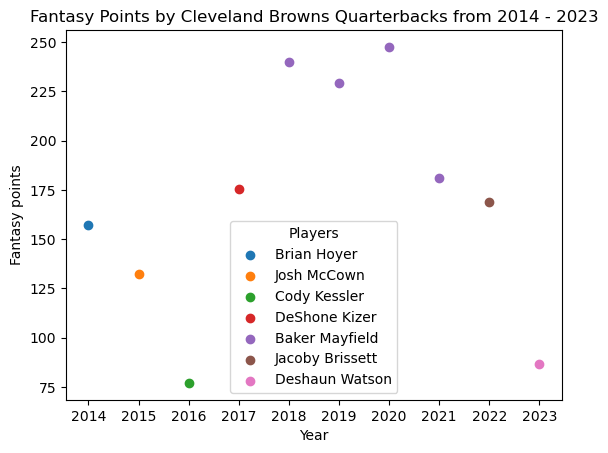

In [67]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig4, ax4 = plt.subplots()

for player in cqb_df['Player'].unique(): 
    player_data = cqb_df[cqb_df['Player'] == player] 
    ax4.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax4.set_xlabel('Year')
ax4.set_ylabel('Fantasy points')
ax4.set_title('Fantasy Points by Cleveland Browns Quarterbacks from 2014 - 2023')

plt.show()

#### Cleveland Wide Recievers

In [68]:
hawkins = dfsBro[7].iloc[0:1]
benjamin = dfsBro[8].iloc[1:2]
coleman = dfsBro[9].iloc[0:2]
callaway = dfsBro[10].iloc[0:1]
odell = dfsBro[11].iloc[5:6]
landry = dfsBro[12].iloc[6:8]
cooper = dfsBro[13].iloc[8:10]

In [69]:
cwr_df = pd.concat([hawkins, benjamin, coleman, callaway, odell, landry, cooper])
cwr_df['Player'] = ''
cwr_df = cwr_df.reset_index(drop = True)
cwr_df = col_selection(cwr_df)
cwr_df.loc[0, 'Player'] = 'Andrew Hawkins'
cwr_df.loc[1, 'Player'] = 'Travis Benjamin'
cwr_df.loc[2:3, 'Player'] = 'Corey Coleman'
cwr_df.loc[4, 'Player'] = 'Antonio Callaway'
cwr_df.loc[5, 'Player'] = 'Odell Beckham Jr.'
cwr_df.loc[6:7, 'Player'] = 'Jarvis Landry'
cwr_df.loc[8:9, 'Player'] = 'Amari Cooper'
cwr_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CLE,15,95.90,Andrew Hawkins
1,2015,CLE,16,129.80,Travis Benjamin
2,2016,CLE,10,60.30,Corey Coleman
3,2017,CLE,9,42.50,Corey Coleman
4,2018,CLE,16,89.30,Antonio Callaway
5,2019,CLE,16,127.30,Odell Beckham Jr.
6,2020,CLE,15,115.96,Jarvis Landry
7,2021,CLE,12,81.00,Jarvis Landry
8,2022,CLE,17,168.00,Amari Cooper
9,2023,CLE,15,155.00,Amari Cooper


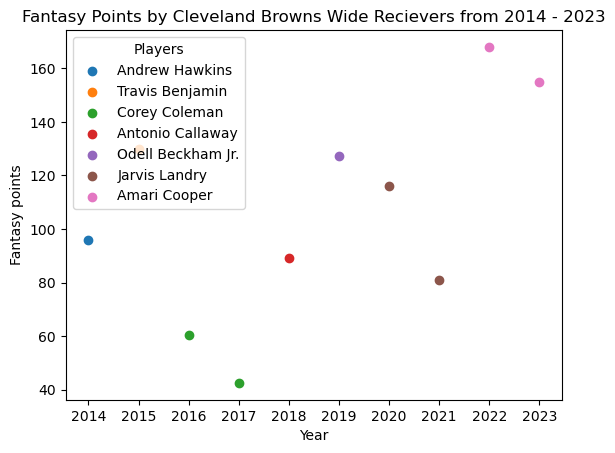

In [70]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig4, ax4 = plt.subplots()

for player in cwr_df['Player'].unique(): 
    player_data = cwr_df[cwr_df['Player'] == player] 
    ax4.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax4.set_xlabel('Year')
ax4.set_ylabel('Fantasy points')
ax4.set_title('Fantasy Points by Cleveland Browns Wide Recievers from 2014 - 2023')

plt.show()

#### Cleveland Running Backs

In [71]:
crowell = dfsBro[14].iloc[0:4]
chubb = dfsBro[15].iloc[0:5]
ford = dfsBro[16].iloc[1:2]

In [72]:
crb_df = pd.concat([crowell, chubb, ford])
crb_df['Player'] = ''
crb_df = crb_df.reset_index(drop = True)
crb_df = col_selection(crb_df)
crb_df.loc[0:3, 'Player'] = 'Isaiah Crowell'
crb_df.loc[4:8, 'Player'] = 'Nick Chubb'
crb_df.loc[9, 'Player'] = 'Jerome Ford'
crb_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CLE,16,113.4,Isaiah Crowell
1,2015,CLE,16,118.9,Isaiah Crowell
2,2016,CLE,16,165.1,Isaiah Crowell
3,2017,CLE,16,115.5,Isaiah Crowell
4,2018,CLE,16,174.5,Nick Chubb
5,2019,CLE,16,219.2,Nick Chubb
6,2020,CLE,12,191.7,Nick Chubb
7,2021,CLE,14,195.3,Nick Chubb
8,2022,CLE,17,254.4,Nick Chubb
9,2023,CLE,17,167.2,Jerome Ford


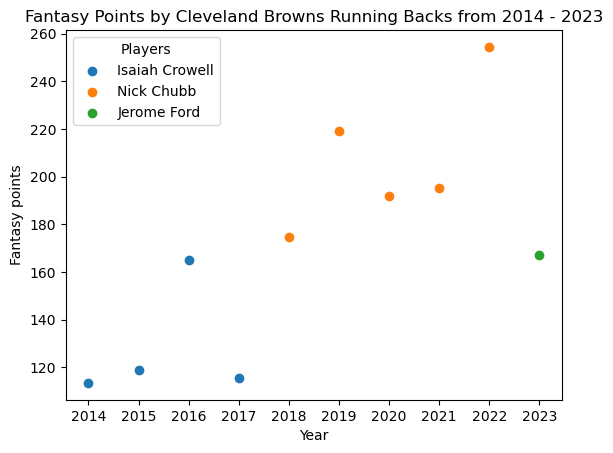

In [73]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig4, ax4 = plt.subplots()

for player in crb_df['Player'].unique(): 
    player_data = crb_df[crb_df['Player'] == player] 
    ax4.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax4.set_xlabel('Year')
ax4.set_ylabel('Fantasy points')
ax4.set_title('Fantasy Points by Cleveland Browns Running Backs from 2014 - 2023')

plt.show()

#### Cleveland Tight Ends

I had to do the same thing for this dataframe as I did with the Tight Ends dataframe for the Bengals, as Njoku played from 2017-2018, and then was injured until 2021.

In [74]:
cameron = dfsBro[17].iloc[0:1]
barnidge = dfsBro[18].iloc[1:3]
njoku = dfsBro[19].iloc[0:2]
dharris = dfsBro[20].iloc[5:6]
hooper = dfsBro[21].iloc[4:5]
njoku_later = dfsBro[22].loc[dfsBro[22]['Year'].between(2021, 2023)].copy()
njoku_later['Player'] = 'David Njoku'

In [75]:
cte_df = pd.concat([cameron, barnidge, njoku, dharris, hooper, njoku_later], ignore_index=True)
cte_df.loc[0, 'Player'] = 'Jordan Cameron'
cte_df.loc[1:2, 'Player'] = 'Gary Barnidge'
cte_df.loc[3:4, 'Player'] = 'David Njoku'
cte_df.loc[5, 'Player'] = 'Demetrius Harris'
cte_df.loc[6, 'Player'] = 'Austin Hooper'
cte_df = cte_df.sort_values(by='Year').reset_index(drop=True)
cte_df

,Year,Team,Games Played,Fantasy Points,Player
0,2014,CLE,10,54.4,Jordan Cameron
1,2015,CLE,16,158.3,Gary Barnidge
2,2016,CLE,16,75.2,Gary Barnidge
3,2017,CLE,16,62.7,David Njoku
4,2018,CLE,16,87.9,David Njoku
5,2019,CLE,15,32.9,Demetrius Harris
6,2020,CLE,13,67.5,Austin Hooper
7,2021,CLE,16,71.6,David Njoku
8,2022,CLE,14,84.0,David Njoku
9,2023,CLE,16,120.2,David Njoku


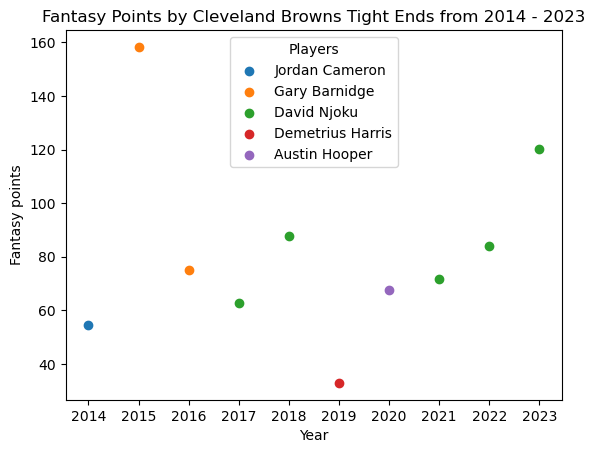

In [76]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig4, ax4 = plt.subplots()

for player in cte_df['Player'].unique(): 
    player_data = cte_df[cte_df['Player'] == player] 
    ax4.scatter(player_data['Year'], player_data['Fantasy Points'], label=player)

plt.xticks(years)
plt.legend(title = 'Players')
ax4.set_xlabel('Year')
ax4.set_ylabel('Fantasy points')
ax4.set_title('Fantasy Points by Cleveland Browns Tight Ends from 2014 - 2023')

plt.show()

#### Total Cleveland Position Group Graph

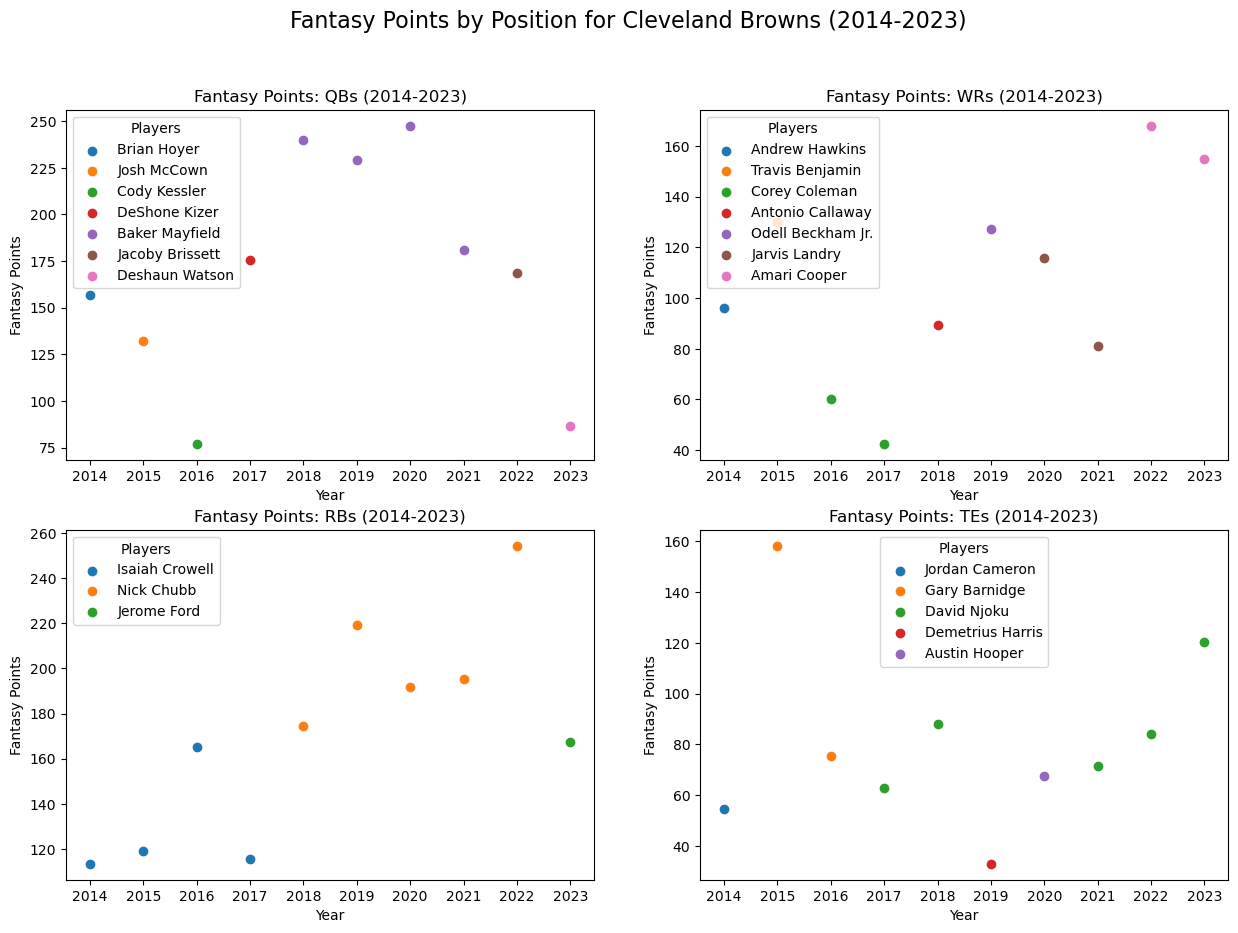

In [77]:
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
fig4, ax4 = plt.subplots(2, 2, figsize=(15, 10))

for player in cqb_df['Player'].unique(): 
    player_data = cqb_df[cqb_df['Player'] == player] 
    ax4[0,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax4[0,0].set_xlabel('Year')
ax4[0,0].set_ylabel('Fantasy Points')
ax4[0,0].set_title('Fantasy Points: QBs (2014-2023)')
ax4[0,0].set_xticks(years) 
ax4[0,0].legend(title='Players')

for player in cwr_df['Player'].unique(): 
    player_data = cwr_df[cwr_df['Player'] == player] 
    ax4[0,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax4[0,1].set_xlabel('Year')
ax4[0,1].set_ylabel('Fantasy Points')
ax4[0,1].set_title('Fantasy Points: WRs (2014-2023)')
ax4[0,1].set_xticks(years)
ax4[0,1].legend(title='Players')

for player in crb_df['Player'].unique(): 
    player_data = crb_df[crb_df['Player'] == player] 
    ax4[1,0].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax4[1,0].set_xlabel('Year')
ax4[1,0].set_ylabel('Fantasy Points')
ax4[1,0].set_title('Fantasy Points: RBs (2014-2023)')
ax4[1,0].set_xticks(years)
ax4[1,0].legend(title='Players')

for player in cte_df['Player'].unique(): 
    player_data = cte_df[cte_df['Player'] == player] 
    ax4[1,1].scatter(player_data['Year'], player_data['Fantasy Points'], label=player)
ax4[1,1].set_xlabel('Year')
ax4[1,1].set_ylabel('Fantasy Points')
ax4[1,1].set_title('Fantasy Points: TEs (2014-2023)')
ax4[1,1].set_xticks(years)
ax4[1,1].legend(title='Players')

fig4.suptitle('Fantasy Points by Position for Cleveland Browns (2014-2023)', fontsize=16)
plt.show()

#### Cleveland Total Fantasy Points

In [78]:
cqb_fantasy_points = cqb_df['Fantasy Points'].sum()
cwr_fantasy_points = cwr_df['Fantasy Points'].sum()
cte_fantasy_points = cte_df['Fantasy Points'].sum()
crb_fantasy_points = crb_df['Fantasy Points'].sum()

bro_tot_fantasy_points = cqb_fantasy_points + cwr_fantasy_points + cte_fantasy_points + crb_fantasy_points
bro_tot_fantasy_points

5289.9400000000005

### Combined Data For All of the AFC North Teams

The code below is making a dataframe for all of the teams total fantasy points and ranking them from most to least

In [81]:
team_fantasy_points = {
    'Baltimore Ravens': rav_tot_fantasy_points,
    'Pittsburgh Steelers': ste_tot_fantasy_points,
    'Cleveland Browns': bro_tot_fantasy_points,
    'Cincinnati Bengals': ben_tot_fantasy_points
}
team_fantasy_df = pd.DataFrame(list(team_fantasy_points.items()), columns=['Team', 'Total Fantasy Points'])
team_fantasy_df = team_fantasy_df.sort_values(by='Total Fantasy Points', ascending=False)
team_fantasy_df

,Team,Total Fantasy Points
1,Pittsburgh Steelers,6468.14
3,Cincinnati Bengals,6043.34
0,Baltimore Ravens,5853.08
2,Cleveland Browns,5289.94


For this graph below, I wanted to make a visual representation of how many fantasy points was scored by each team. This graph shows the Steelers with the most on the left side, to the Browns on the right side with the least. I also color coordinated the graph by the teams primary colors (minus the browns because for some reason the color 'Brown' is more of a redish color)

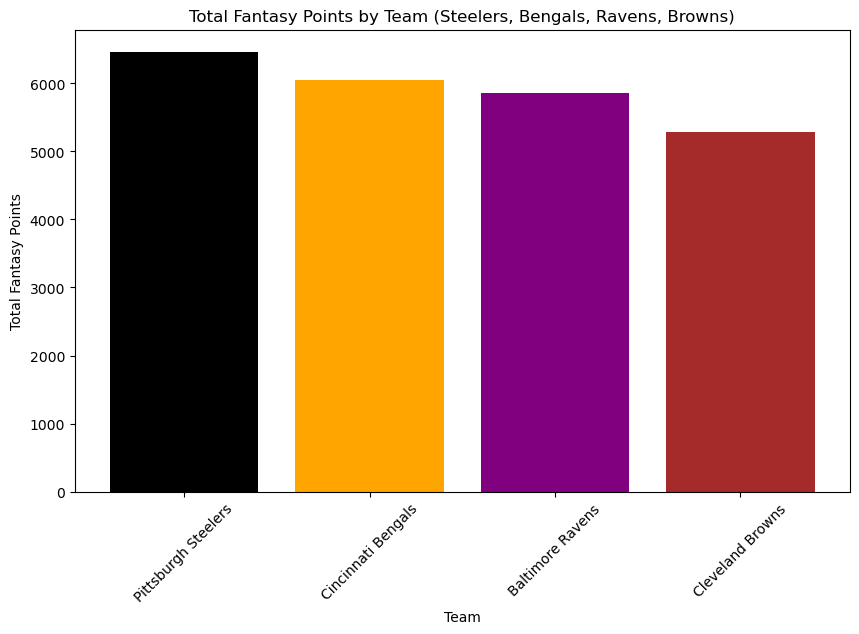

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(team_fantasy_df['Team'], team_fantasy_df['Total Fantasy Points'], color=['black', 'orange', 'purple', 'brown'])
plt.xlabel('Team')
plt.ylabel('Total Fantasy Points')
plt.title('Total Fantasy Points by Team (Steelers, Bengals, Ravens, Browns)')
plt.xticks(rotation=45)
plt.show()

### Conclusion
The conclusion that I have been able to gather from this data is that the Pittsburgh Steelers have had the most fantast points over the past 10 years. The Steelers have had a lot of points from all of their positions except for the tight end group over the past 10 years. The Bengals come in second, having very consistent points from most of their positions except for the tight end position again. While their position players may not have had as high totals as the Steelers, they had more consistent points through all of their players, which is why they arent super far behind the Steelers. The team in third is the Ravens. The reason for the Ravens being further behind the top two is because they have had major inconsistency with their wide reciever position. While this is the case, they have had the most consistent tight end group out of all four teams, which is why they are only about 200 points behind the Bengals. The team in last is the Browns. The reason for the Browns being at the bottom is because they have had many inconsistencies throughout the last 10 years, with almost all of the positions except for the running back position. The other question that I asked at the beginning was whether or not there was a method to the way that certain position, and I found that varies depending on the player for the team. For example, the Browns were very inconsistent for many years at the quarterback position until Baker Mayfield came in and started putting up more consistent numbers. This is true for almost all of the teams, where they are inconsistent at some positions depending on the year. The total fantasy points also are a reflection of the record that the teams had had over the years. The Steelers have been the most consistent team in the last 10 years, never finishing below nine wins in a season, while the Browns have had multiple seasons with a losing record, including an 0-16 year in 2017. Some of the limitations that could cause inconsistencies in this project as a whole are that some of the players may not have stayed the number 1 at their position throughout the whole season, with their point total declining as the year goes on. Another inconsitency could be injury, whereas the starter for the year gets injured and doesn't get to play out the rest of the season compared to some players on other teams. Unfortunately, without doing every team individually for the whole season over every offensive position, the full data will not be completely accurate over the last 10 years. Overall, I really enjoyed this project as it allowed me to track the data for something I really love, and I found this information super interesting. I would have originally thought that the Ravens would have been in second over the Bengals, and it is really interesting to see how that changes.